Aims of this dataset:<br>
Combine most useful feats of chem and MACCS keys<br>
validate importance of source feature

In [61]:
# temporary working here to deal with double values and insert it later as new section before section joining

In [1]:
import numpy as np
import pandas as pd 
import _pickle as pkl

#### 1. Modify DB data
1. Conc names & cell lines to find duplicates
2. Combine them
3. Set values above 100 to 100

#### 3. Combination ID?

In [2]:
with open('./intermediate-pickles-scoring2/finalFrame1.pkl', 'rb') as inp:
    data1 = pkl.load(inp)

FileNotFoundError: [Errno 2] No such file or directory: './intermediate-pickles-scoring2/finalFrame1.pkl'

In [ ]:
data

In [23]:
data1 = data1.dropna()
data1.reset_index(inplace=True,drop=True)
print("Data1 has records ",len(data1))
print("Data2 has records ",len(data2))
data1.head(2)

Data1 has records  457614
Data2 has records  603376


,drugConc,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA,index,...,D2 EState_VSA2,D2 EState_VSA3,D2 VSA_EState1,D2 VSA_EState2,D2 VSA_EState3,age,cat_Cancer cell line,cat_Embryonic stem cell,cat_Hybridoma,cat_Transformed cell line
0,5-fuabt-888,1,5-fu,abt-888,A2058,2.5850,8.8500,-0.1575,8.1300,62797,...,5.538925,11.080152,0.000000,19.238682,3.448989,43.0,1.0,0.0,0.0,0.0
1,5-fuazd1775,5,5-fu,azd1775,A2058,9.8175,11.2075,5.8375,14.0975,36325,...,12.104023,28.493531,3.162078,31.601287,14.099736,43.0,1.0,0.0,0.0,0.0


38

#### 4. Making Predictions

In [50]:
Y1 = data1.iloc[:,9]
X1 = data1.iloc[:,11:]
X1.drop(["D1 Ipc","D2 Ipc"],axis=1,inplace=True)

Y2 = data2.iloc[:,9]
X2 = data2.iloc[:,10:]
X2.drop(["D1 Ipc","D2 Ipc"],axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_train1,x_test1,Y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.3,stratify=Y1) #consider stratifying on combination
X_train2,x_test2,Y_train2,y_test2 = train_test_split(X2,Y2,test_size=0.3,stratify=Y2)

In [54]:
with open('./intermediate-pickles-scoring2/trainTestSplit/X_train1.pkl', 'wb') as outp:
    pkl.dump(X_train1, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/X_train2.pkl', 'wb') as outp:
    pkl.dump(X_train2, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/x_test1.pkl', 'wb') as outp:
    pkl.dump(x_test1, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/x_test2.pkl', 'wb') as outp:
    pkl.dump(x_test2, outp)

with open('./intermediate-pickles-scoring2/trainTestSplit/Y_train1.pkl', 'wb') as outp:
    pkl.dump(Y_train1, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/Y_train2.pkl', 'wb') as outp:
    pkl.dump(Y_train2, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/y_test1.pkl', 'wb') as outp:
    pkl.dump(y_test1, outp)
with open('./intermediate-pickles-scoring2/trainTestSplit/y_test2.pkl', 'wb') as outp:
    pkl.dump(y_test2, outp)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 

regressor1 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100, verbose=True)
regressor1.fit(X_train1,Y_train1)

predTrain1=regressor1.predict(X_train1)
predTest1=regressor1.predict(x_test1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [60]:
regressor2 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100, verbose=True)
regressor2.fit(X_train2,Y_train2)

predTrain2=regressor2.predict(X_train2)
predTest2=regressor2.predict(x_test2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [61]:
from sklearn.dummy import DummyRegressor
dummyRegressor1 = DummyRegressor()
dummyRegressor1.fit(X_train1,Y_train1)

predTrainDumm1=dummyRegressor1.predict(X_train1)
predTestDumm1=dummyRegressor1.predict(x_test1)

dummyRegressor2 = DummyRegressor()
dummyRegressor2.fit(X_train2,Y_train2)

predTrainDumm2=dummyRegressor2.predict(X_train2)
predTestDumm2=dummyRegressor2.predict(x_test2)

#### 5. Bonus: Adding Source as feature

In [89]:
YB = data1.iloc[:,9]
XB = data1.iloc[:,10:]

sourceDummies = pd.get_dummies(XB.source,prefix="Source")
XB[["Source_ALMANAC","Souce_ONEIL"]]=sourceDummies

XB.drop(["source","D1 Ipc","D2 Ipc"],axis=1,inplace=True)

XB.head(2)

,D1 Eccentricity,D1 InertialShapeFactor,D1 NPR1,D1 NPR2,D1 PMI1,D1 PMI2,D1 PMI3,D1 RadiusOfGyration,D1 SpherocityIndex,D1 FractionCSP3,...,D2 VSA_EState1,D2 VSA_EState2,D2 VSA_EState3,age,cat_Cancer cell line,cat_Embryonic stem cell,cat_Hybridoma,cat_Transformed cell line,Source_ALMANAC,Souce_ONEIL
0,0.956402,0.004792,0.292055,0.707945,147.739172,358.121584,505.860756,1.97203,1.259740e-12,0.0,...,0.000000,19.238682,3.448989,43.0,1.0,0.0,0.0,0.0,0,1
1,0.956402,0.004792,0.292055,0.707945,147.739172,358.121584,505.860756,1.97203,1.259740e-12,0.0,...,3.162078,31.601287,14.099736,43.0,1.0,0.0,0.0,0.0,0,1


In [92]:
XB.shape

(457614, 143)

In [97]:
X_trainB,x_testB,Y_trainB,y_testB = train_test_split(XB,YB,test_size=0.3,stratify=YB) #consider stratifying on combination
print("Starting Regressor: ", datetime.datetime.now())

regressorB = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=600, verbose=True)
regressorB.fit(X_trainB,Y_trainB)

print("Finished Training Regressor: ", datetime.datetime.now())

predTrainB=regressorB.predict(X_trainB)
predTestB=regressorB.predict(x_testB)

Starting Regressor:  2022-05-26 16:37:19.424703


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 58.2min finished


Finished Training Regressor:  2022-05-26 17:35:32.505675


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.3s finished


In [98]:
dummyRegressorB = DummyRegressor()
dummyRegressorB.fit(X_trainB,Y_trainB)

predTrainDummB=dummyRegressorB.predict(X_trainB)
predTestDummB=dummyRegressorB.predict(x_testB)

In [94]:
#do MSE and 

2

#### 6. Scoring (Mean Absolute/Squared Error)

In [69]:
print("## The performances in MAE are:")
print("\nSmall Dataset:")
print("On Training Data: ",np.mean(np.abs(predTrain1-Y_train1)))
print("On Testing  Data: ",np.mean(np.abs(predTest1-y_test1)))
print("Dummy Training  : ",np.mean(np.abs(predTrainDumm1-Y_train1)))
print("Dummy Testing   : ",np.mean(np.abs(predTestDumm1-y_test1)))
print("\nBig Dataset:")
print("On Training Data: ",np.mean(np.abs(predTrain2-Y_train2)))
print("On Testing  Data: ",np.mean(np.abs(predTest2-y_test2)))
print("Dummy Training  : ",np.mean(np.abs(predTrainDumm2-Y_train2)))
print("Dummy Testing   : ",np.mean(np.abs(predTestDumm2-y_test2)))

## The performances are:

Small Dataset:
On Training Data:  3.8512295736362114
On Testing  Data:  3.856709127409338
Dummy Training  :  4.019826881637109
Dummy Testing   :  4.020777303474963

Big Dataset:
On Training Data:  4.023602782805237
On Testing  Data:  4.038416459991488
Dummy Training  :  4.17312462139542
Dummy Testing   :  4.188929710733737


In [99]:
print("## The performances in MSE are:")
print("\nSmall Dataset:")
print("On Training Data: ",np.mean(np.square(predTrain1-Y_train1)))
print("On Testing  Data: ",np.mean(np.square(predTest1-y_test1)))
print("Dummy Training  : ",np.mean(np.square(predTrainDumm1-Y_train1)))
print("Dummy Testing   : ",np.mean(np.square(predTestDumm1-y_test1)))
print("\nBig Dataset:")
print("On Training Data: ",np.mean(np.square(predTrain2-Y_train2)))
print("On Testing  Data: ",np.mean(np.square(predTest2-y_test2)))
print("Dummy Training  : ",np.mean(np.square(predTrainDumm2-Y_train2)))
print("Dummy Testing   : ",np.mean(np.square(predTestDumm2-y_test2)))

## The performances in MSE are:

Small Dataset:
On Training Data:  32.484186707350744
On Testing  Data:  32.84695566451583
Dummy Training  :  36.058513836791256
Dummy Testing   :  36.36555926960286

Big Dataset:
On Training Data:  34.73133734048182
On Testing  Data:  35.346908681521796
Dummy Training  :  38.12436906145257
Dummy Testing   :  38.80865347982537


In [100]:
#for 600 trees forest and additional source feature on small Dataset
print("## The performances for Big Tree are:")
print("\nMAE:")
print("On Training Data: ",np.mean(np.abs(predTrainB-Y_trainB)))
print("On Testing  Data: ",np.mean(np.abs(predTestB-y_testB)))
print("Dummy Training  : ",np.mean(np.abs(predTrainDummB-Y_trainB)))
print("Dummy Testing   : ",np.mean(np.abs(predTestDummB-y_testB)))
print("\nMSE:")
print("On Training Data: ",np.mean(np.square(predTrainB-Y_trainB)))
print("On Testing  Data: ",np.mean(np.square(predTestB-y_testB)))
print("Dummy Training  : ",np.mean(np.square(predTrainDummB-Y_trainB)))
print("Dummy Testing   : ",np.mean(np.square(predTestDummB-y_testB)))

## The performances for Big Tree are:

MAE:
On Training Data:  3.7530182866518524
On Testing  Data:  3.7596516827028528
Dummy Training  :  4.019687558305475
Dummy Testing   :  4.02103141996947

MSE:
On Training Data:  31.331425615413046
On Testing  Data:  31.39159030244759
Dummy Training  :  36.13806376984807
Dummy Testing   :  36.179945957676864


<b>This shows improvement of th bigger classifier over the previous ones in both MSE and MAE</b><br>
To ensure this is due to size on not additional feature, I look at the feature importances. Given the magnitude of increase, one of the source feats must be very high

In [110]:
featsB = pd.DataFrame([np.array(x_testB.columns),regressorB.feature_importances_]).transpose()
featImportance = featsB.sort_values(by=1,ascending=False).head(20).reset_index(drop=True)
featImportance.rename(columns={0:"Feat B",1:"Relevance B"},inplace=True)

feats1 = pd.DataFrame([np.array(x_test1.columns),regressor1.feature_importances_]).transpose()
featImportance[["Feat 1","Relevance 1"]] = feats1.sort_values(by=1,ascending=False).head(20).reset_index(drop=True)

feats2 = pd.DataFrame([np.array(x_test2.columns),regressor2.feature_importances_]).transpose()
featImportance[["Feat 2","Relevance 2"]] = feats2.sort_values(by=1,ascending=False).head(20).reset_index(drop=True)
featImportance
#note: BalabanJ, BertzCT, MolMR/SMR are similar features ranking high in 1 & 2
#in the big classifier, there are very different feats, with the source being by far the strongest

#new speculative hypothesis: The features above serve somehow as proxy in order to identify the source

,Feat B,Relevance B,Feat 1,Relevance 1,Feat 2,Relevance 2
0,Souce_ONEIL,0.302047,D1 Chi4n,0.245642,D1 MolMR,0.320916
1,Source_ALMANAC,0.17608,D2 MolMR,0.195147,D2 MolMR,0.215875
2,D1 Chi1v,0.163801,D2 Chi1v,0.062346,D1 BertzCT,0.072413
3,D2 Chi1v,0.129007,D1 BertzCT,0.057076,D2 BertzCT,0.067018
4,D2 MolLogP,0.05473,D1 BalabanJ,0.048644,D1 PEOE_VSA1,0.044067
5,D1 MolLogP,0.037876,D2 Chi4n,0.046838,D2 HeavyAtomMolWt,0.040029
6,D1 PEOE_VSA1,0.032958,D2 BertzCT,0.030797,D2 BalabanJ,0.033935
7,D2 SpherocityIndex,0.017764,D2 BalabanJ,0.026773,D2 SMR_VSA1,0.016949
8,D2 BalabanJ,0.014459,D1 MolMR,0.023566,D2 NPR1,0.016426
9,D1 PMI1,0.011746,D2 RingCount,0.017627,D2 VSA_EState2,0.013587


#### 6. Tuning Features

In [41]:
from sklearn.model_selection import train_test_split

X = data1.iloc[:,9:]
Y = data1.iloc[:,8]

X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)

In [ ]:
#TEST AND TRAIN SWITCHED UP
from sklearn.ensemble import RandomForestRegressor 

scoresTrain = []
scoresTest = []

max_depthF = [140,80,40,20,10] #10 and 20 is too little, then indifferent
min_samples_splitF = [2,8,32,128] #overfitting; 32+ is best
no_trees = [2,16,64,128] # beyond 16 some improvement, but not drastically: 32 seems reasonable

print("starting now")
for k in range(1):#placeholder
    localTrain3= []
    localTest3 = []
    for j in max_depthF:
        localTrain2= []
        localTest2 = []
        for i in min_samples_splitF:
            localTrain1= []
            localTest1 = []
            for l in no_trees:
                regressorN = RandomForestRegressor(max_depth=j,
                                               min_samples_split = i, bootstrap=True, n_jobs=-1,
                                               n_estimators=l, verbose=True)
                regressorN.fit(X_train.iloc[:,2:],Y_train)
        
                localTest1.append(np.mean(np.abs(regressorN.predict(x_test.iloc[:,2:])-y_test))) #do also train
                localTrain1.append(np.mean(np.abs(regressorN.predict(X_train.iloc[:,2:])-Y_train))) 
            localTrain2.append(localTrain1)
            localTest2.append(localTest1)
        localTrain3.append(localTrain2)
        localTest3.append(localTest2)
        
    scoresTrain.append(localTrain3)
    scoresTest.append(localTest3)

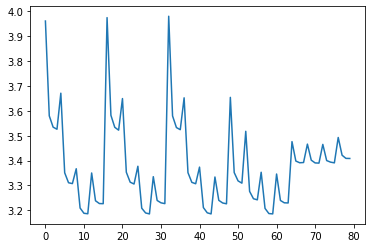

In [82]:
from matplotlib import pyplot as plt

# main axis: max depth, second axis samples split, inner axis number trees
plt.plot(np.array(scoresTest[0]).flatten())

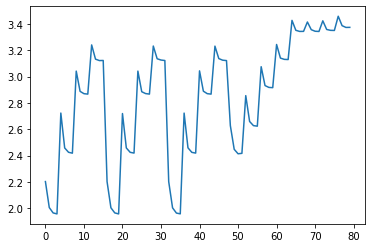

In [84]:
plt.plot(np.array(scoresTrain[0]).flatten())

We note:<br>
1. Overfitting for small minSample split: The smaller, the better the performance on training data, the worse on testing
2. For Max depth so long as it is at least above a certain minimum it is indifferent
3. Increases in number of trees levels off quickly

In [87]:
regressorB = RandomForestRegressor(max_depth=40,min_samples_split = 40,
                                   bootstrap=True, n_jobs=-1,n_estimators=35, verbose=True)
regressorB.fit(X_train.iloc[:,2:],Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   42.4s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   43.9s finished


RandomForestRegressor(max_depth=40, min_samples_split=40, n_estimators=35,
                      n_jobs=-1, verbose=True)

In [90]:
pred = regressorB.predict(x_test.iloc[:,2:])

obs = pd.DataFrame({"combination_idx":x_test.iloc[:,0],"y_test":y_test,"pred":pred})

obs.head()

[Parallel(n_jobs=35)]: Using backend ThreadingBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   2 out of  35 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=35)]: Done  35 out of  35 | elapsed:    0.2s finished


,combination_idx,y_test,pred
260319,71329,-1.1800,-2.404595
14806,2308,6.7875,0.248995
256715,6564,-2.6800,-1.249818
292634,11087,-2.6200,-0.773422
83888,13349,-0.6800,-0.454807


In [93]:
from scoring import primaryMetric
print("Challenge Winner Performance: ~0.4")
print("Performance on Test Data: ",primaryMetric(obs))

Challenge Winner Performance: ~0.4
Performance on Test Data:  0.058673697203231456


In [94]:
feats = pd.DataFrame([np.array(x_test.iloc[:,2:].columns),regressorB.feature_importances_]).transpose()
featImportance = feats.sort_values(by=1,ascending=False).head(20).reset_index(drop=True)
featImportance.rename(columns={0:"Feats",1:"Relevance"},inplace=True)
featImportance

,Feats,Relevance
0,age,0.126748
1,D1 Ipc,0.040551
2,D2 Chi4n,0.036838
3,D2 Ipc,0.025769
4,D2 BalabanJ,0.02536
5,D1 Chi4n,0.024335
6,D1 BalabanJ,0.020584
7,D1 Kappa3,0.017116
8,D2 Kappa3,0.015833
9,D2 BertzCT,0.014187


### Experimental reproducibility

In [131]:
#data from very top
#"index values" of rows where the drug-drug-cell combination occurs multiple times 
idx = data.groupby("index").count().drop(data.groupby("index").count()[data.groupby("index").count()["Drug1"]<2].index).index

In [140]:
multi_occurence = data.set_index("index").loc[idx]

In [146]:
firsts = multi_occurence.reset_index().groupby("drug_drug2").first()
lasts = multi_occurence.reset_index().groupby("drug_drug2").last()

In [160]:
obs = pd.DataFrame({"combination_idx":firsts["index"],"y_test":firsts["HSA"],"pred":lasts["HSA"]})

obs.head()

,combination_idx,y_test,pred
drug_drug2,,,
(+)-jq1(+)-jq1TMD8,898,4.10,1.02
(+)-jq110356-76-0U-HO1,211297,1.61,3.93
(+)-jq11088965-37-0U-HO1,324674,-10.66,-1.63
(+)-jq1200484-11-3U-HO1,86410,17.62,4.06
(+)-jq1451492-95-8U-HO1,366142,9.83,3.86


In [161]:
np.corrcoef(obs["y_test"],obs["pred"])

array([[1.        , 0.42892327],
       [0.42892327, 1.        ]])